In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Load the data
data = pd.read_csv("../cleaned_data_without_duplicates.csv")

In [3]:
# Calculate Z-scores for age and campaign
data['age_campaign_zscore'] = zscore(data['campaign'])

# Set a threshold for identifying outliers
zscore_threshold = 3

# Identify outliers where campaign deviates significantly from the norm
age_campaign_outliers = data[np.abs(data['age_campaign_zscore']) > zscore_threshold]

# Print the number of outliers
print(f"Number of outliers for age and campaign: {len(age_campaign_outliers)}")


Number of outliers for age and campaign: 680


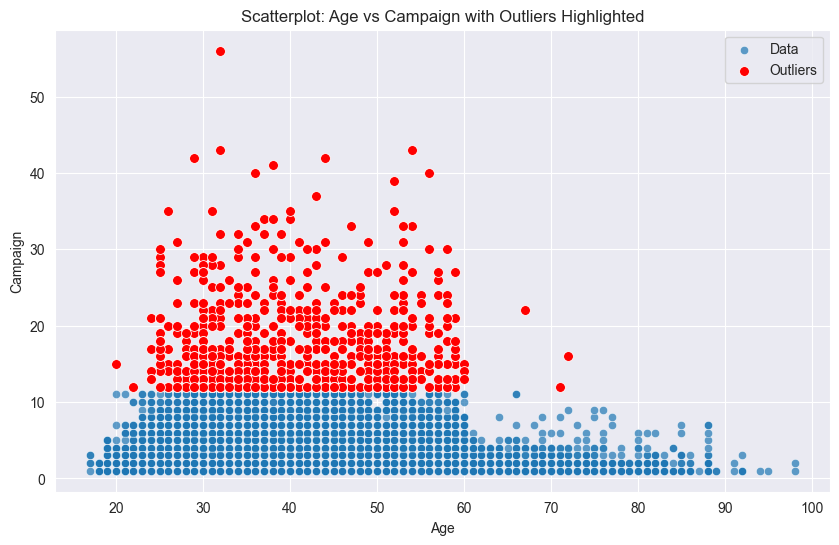

In [4]:
# Visualization: Scatterplot for age vs. campaign highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['campaign'], label='Data', alpha=0.7)
sns.scatterplot(
    x=age_campaign_outliers['age'],
    y=age_campaign_outliers['campaign'],
    color='red', label='Outliers', s=50
)
plt.title('Scatterplot: Age vs Campaign with Outliers Highlighted')
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.legend()
plt.show()

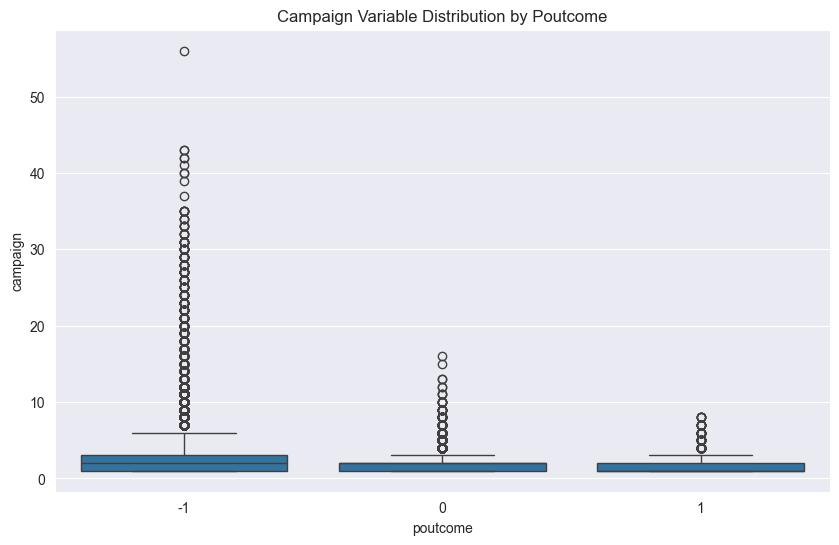

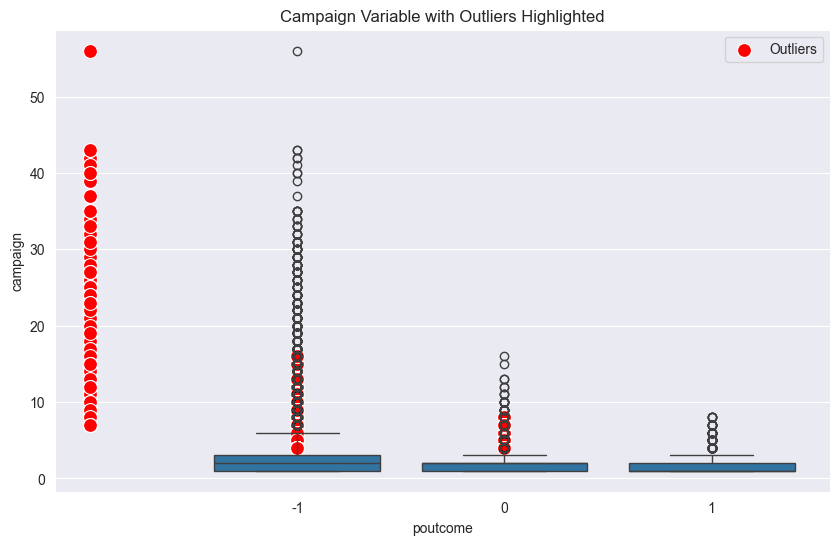

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('../cleaned_data_without_duplicates.csv')

# Step 1: Visualize data with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='poutcome', y='campaign')
plt.title('Campaign Variable Distribution by Poutcome')
plt.show()

# Step 2: Detect outliers using the IQR method for each poutcome
outliers = []

for outcome in df['poutcome'].unique():
    # Filter data by 'poutcome'
    temp_df = df[df['poutcome'] == outcome]

    # Calculate IQR
    Q1 = temp_df['campaign'].quantile(0.25)
    Q3 = temp_df['campaign'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier criteria
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outlier_data = temp_df[(temp_df['campaign'] < lower_bound) | (temp_df['campaign'] > upper_bound)]

    # Append outlier information to the list
    for idx, row in outlier_data.iterrows():
        outliers.append({'index': idx, 'campaign_value': row['campaign'], 'poutcome': row['poutcome']})

# Convert the list of outliers to a DataFrame
outliers_df = pd.DataFrame(outliers)

# Step 3: Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='poutcome', y='campaign')
sns.scatterplot(data=outliers_df, x='poutcome', y='campaign_value', color='red', label='Outliers', s=100)
plt.title('Campaign Variable with Outliers Highlighted')
plt.legend()
plt.show()

C:\Users\iTEC SOLUTIONS\AppData\Local\Temp\ipykernel_15164\4246072103.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[(df_cleaned['poutcome'] == outcome) & (df_cleaned['campaign'] < lower_bound), 'campaign'] = lower_bound


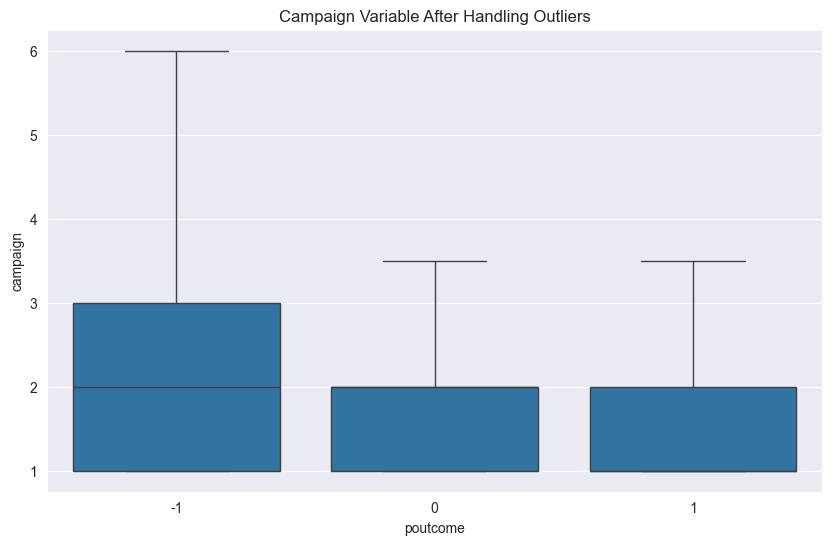

In [6]:
# Step 4: Handle outliers - Clip the campaign values based on the IQR for each poutcome
df_cleaned = df.copy()

for outcome in df['poutcome'].unique():
    # Filter data by 'poutcome'
    temp_df = df_cleaned[df_cleaned['poutcome'] == outcome]

    # Calculate IQR
    Q1 = temp_df['campaign'].quantile(0.25)
    Q3 = temp_df['campaign'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the campaign values within the bounds
    df_cleaned.loc[(df_cleaned['poutcome'] == outcome) & (df_cleaned['campaign'] < lower_bound), 'campaign'] = lower_bound
    df_cleaned.loc[(df_cleaned['poutcome'] == outcome) & (df_cleaned['campaign'] > upper_bound), 'campaign'] = upper_bound

# Step 5: Visualize cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='poutcome', y='campaign')
plt.title('Campaign Variable After Handling Outliers')
plt.show()

In [ ]:
# Function to handle outliers using IQR within groups
# def handle_outliers_by_group(df, numerical_column, group_column):
#     groups = df[group_column].unique()
#     for group in groups:
#         group_data = df[df[group_column] == group]
#         Q1 = group_data[numerical_column].quantile(0.25)
#         Q3 = group_data[numerical_column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df.loc[df[group_column] == group, numerical_column] = df.loc[
#             df[group_column] == group, numerical_column
#         ].apply(lambda x: max(lower_bound, min(upper_bound, x)))
#
# # Handle outliers for numerical columns grouped by marital status and job
# for num_col in numerical_columns:
#     handle_outliers_by_group(df, num_col, "marital")
#     handle_outliers_by_group(df, num_col, "job")
#
# # Save the processed DataFrame to a new CSV file
# processed_file_path = "processed_bank_data_outliers_handled.csv"
# df.to_csv(processed_file_path, index=False)
#
# print(f"Outliers handled and processed data saved to {processed_file_path}.")